# Data Description

As we have to check approval so therefore the problem is classification Problem

# Importing the Libraries

In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset
df = pd.read_csv('LoanApplicationStatus.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We see that Categorical Data Is 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'Loan_Status'

We see that Numerical Data is 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# description of the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Checking For Missing Values 

In [7]:
# checking for missing values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

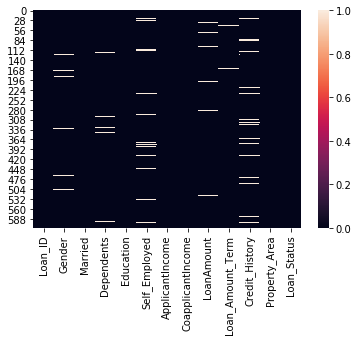

In [8]:
sns.heatmap(df.isna())

We see that there are null values in dataset in columns Gender,Married, Dependents, Self Employed, LoanAmount,    Loan_Amount_Term, 
Credit_History   

In [9]:
df.isna().mean()

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

We see that None of the missing values in the dataset exists more than 8 percent per feature.

## Check the correlations of the features with the dataset

In [10]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


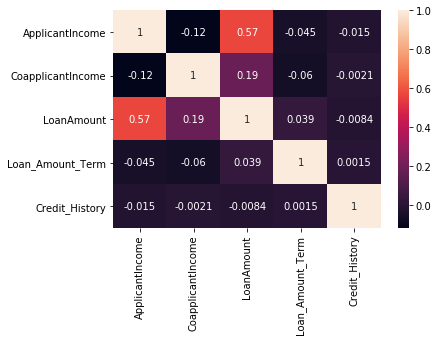

In [11]:
# plotting the correlation
sns.heatmap(df.corr(),annot=True)

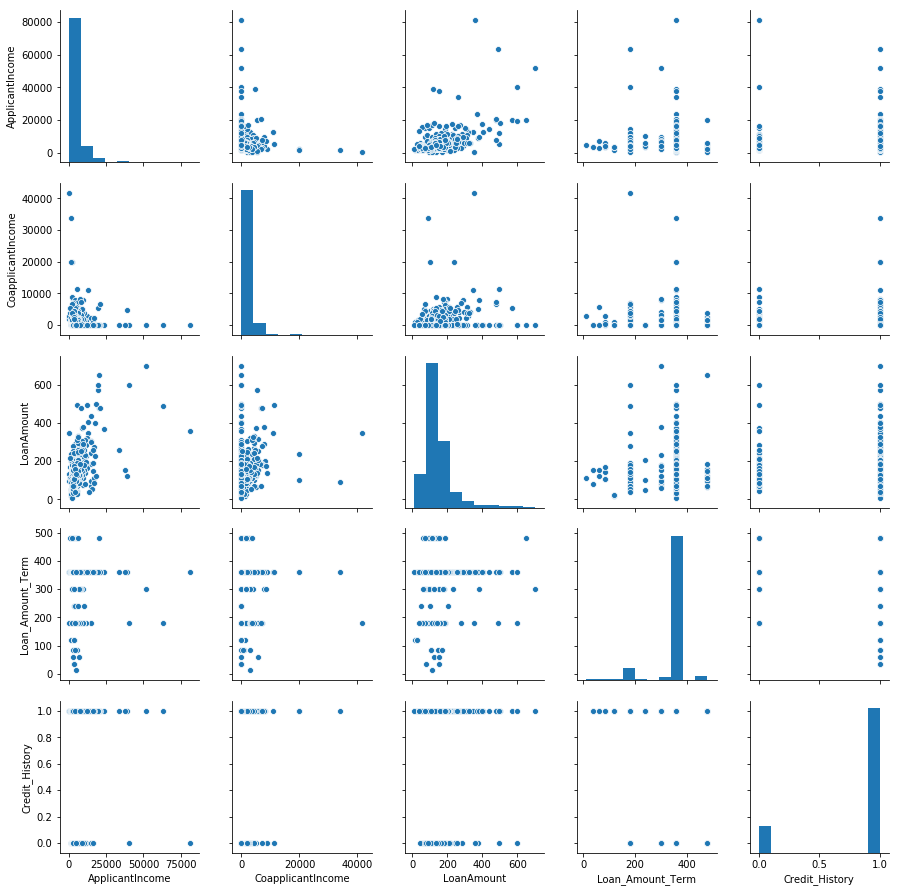

In [12]:
# pairplot of the datasets
sns.pairplot(df)

We see that there is skewness in data

## Univariate Analysis

In [13]:
# helper function
def fig_this_size(x,y):
    return plt.figure(figsize=(x,y))

In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Gender

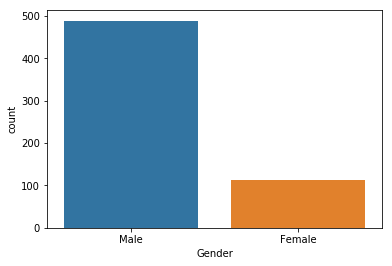

In [15]:
sns.countplot(df.Gender)

* Number of male applicant are more than females, which is kinda obvious.

# Married:

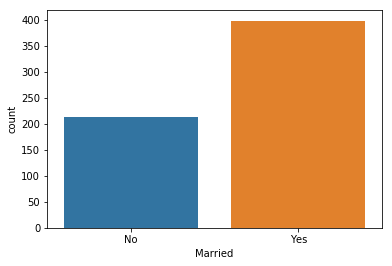

In [16]:
sns.countplot(df.Married)

* The number of married applicant are greater than Unmarried apllicants.
* The married guys are in more need of money, than the non-married ones.

# Dependence:

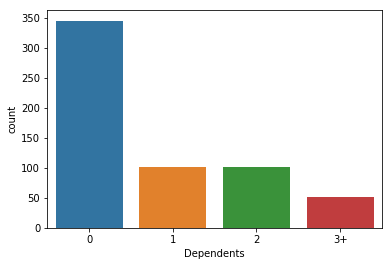

In [17]:
sns.countplot(df.Dependents,order=df.Dependents.value_counts().index)

# Education

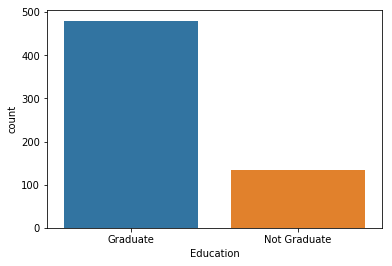

In [18]:
sns.countplot(df.Education)

We see that majority of people who apply for loan are Graduates

# Self-Employed

* An Employee or a Business-man?

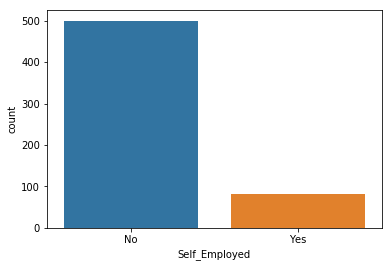

In [19]:
sns.countplot(df.Self_Employed)

We see that majority of people who apply for loan are not self employed.
Very less Self Employed people apply for loan

# Applicant Income

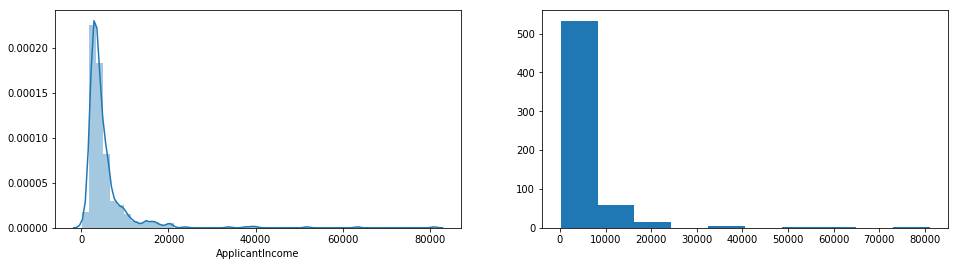

In [20]:
fig = fig_this_size(16,4)


fig.add_subplot(121)
sns.distplot(df.ApplicantIncome)

fig.add_subplot(122)
plt.hist(df.ApplicantIncome);

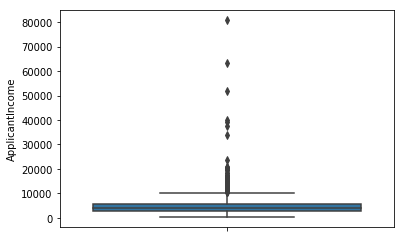

In [21]:
sns.boxplot(df.ApplicantIncome,orient='v')

In [22]:
df.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

* We have an applicant whose imcome is more than 80K, who is potential of taking a huge loan.
* This applicant should is either likely to be a great customer or a Scamster.
* The bank must look in-depth and have a strong collateral if it decides to give loan to such applicants.

# Co-applicant Income:

* A <b>Co-Applicant</b> refers to a person who applies along with the borrower for a loan. This is done so that the income of the co-applicant can be used to supplement the borrower's income and increase his/her eligibility.
* In short, the higher the Co-applicants income the higher the applicants chance of being eligible for the loan.

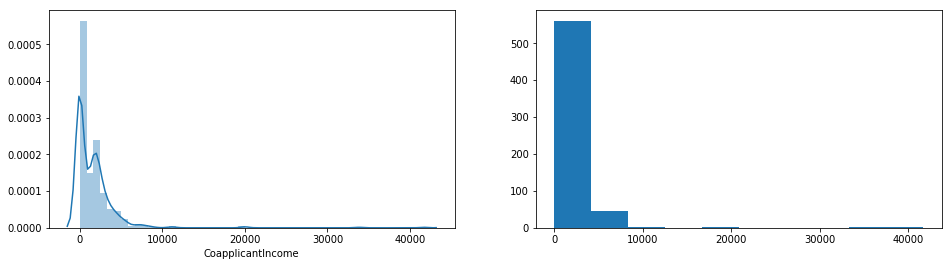

In [23]:
fig = fig_this_size(16,4)

fig.add_subplot(121)
sns.distplot(df.CoapplicantIncome)

fig.add_subplot(122)
plt.hist(df.CoapplicantIncome);

In [24]:
df.CoapplicantIncome.value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [25]:
df.CoapplicantIncome.value_counts()/len(df) * 100

0.0       44.462541
2500.0     0.814332
2083.0     0.814332
1666.0     0.814332
1625.0     0.488599
            ...    
2365.0     0.162866
1695.0     0.162866
2466.0     0.162866
2375.0     0.162866
1700.0     0.162866
Name: CoapplicantIncome, Length: 287, dtype: float64

* Around 45 percent of the Applicants either do not have a Co-appli0cant or the Co-applicant isn't Working.

In [26]:
df.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

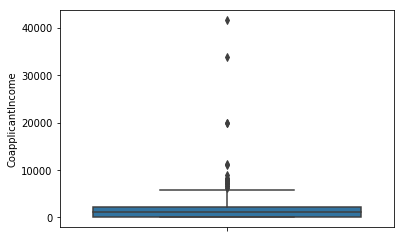

In [27]:
sns.boxplot(df.CoapplicantIncome,orient='v')

In [28]:
# LoanAmount

* The amount of Loan the Apllicant has applied for (in thousands).

In [29]:
df.dropna().sort_values('LoanAmount',ascending=False)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,LP002792,Male,Yes,1,Graduate,No,5468,1032.0,26.0,360.0,1.0,Semiurban,Y
94,LP001325,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,Semiurban,Y
133,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y


In [30]:
# Loan_Amount_Term

* The period to pay back the load amount with interest (in months)
* Note: The Loan_AMount_Term is also set by the applicant and not the bank.

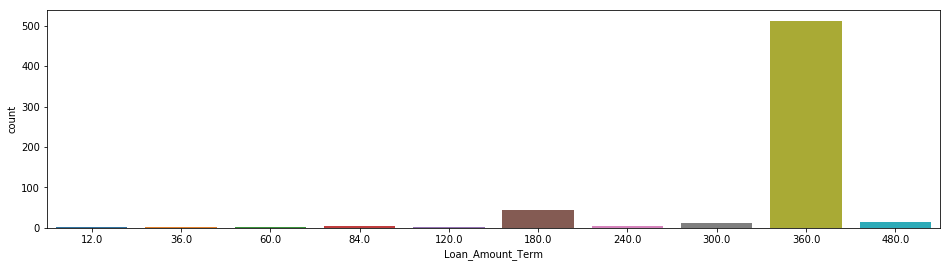

In [31]:
fig_this_size(16,4)
sns.countplot(df.Loan_Amount_Term)

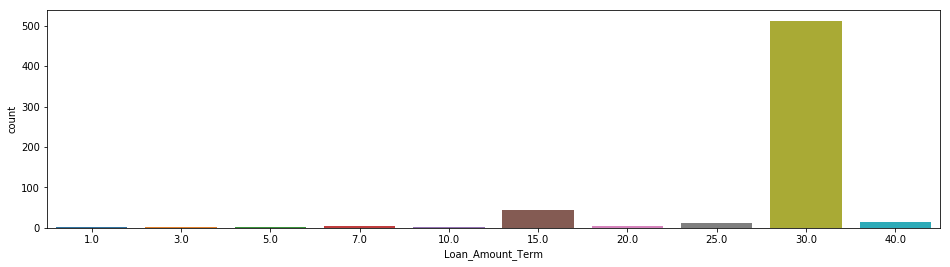

In [32]:
# it's better to visualize it in the years instead of months sometimes.
fig_this_size(16,4)
sns.countplot(df.Loan_Amount_Term/12)

* Most of the poeple apply for loan_amount_term as 360 months (30 years)

In [33]:
# let's ge the avearge loan amount the client applied for 360 months
df[df.Loan_Amount_Term == 360]['LoanAmount'].median()

129.0

* This amount of loan (around 1,30,000) is mostly taken by an applicant to Either buy a house or start-up his business.

In [34]:
# Credit_History

* Positive or Negative credit history.
        * 1: Positive Credit History.
        * 0: Negative Credit History.

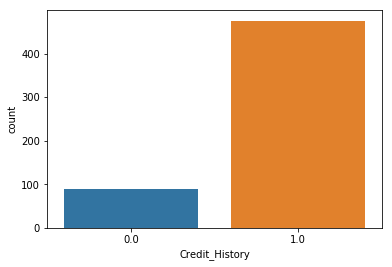

In [35]:
sns.countplot(df.Credit_History)

In [36]:
pd.DataFrame(np.array(list(zip(df.Credit_History.value_counts().index.map({0:'Negative(0)',1:'Positive(1)'}),df.Credit_History.value_counts(),df.Credit_History.value_counts()/len(df)*100))),columns=['Credit_History','Applicants','Percentage_of_Applicants']).set_index('Credit_History')

,Applicants,Percentage_of_Applicants
Credit_History,,
Positive(1),475,77.36156351791531
Negative(0),89,14.495114006514658


* Around 15 percent of the total applicants have negative credit_history,
* Credit history becomes negative if a person does not pay his bills in time.
* Credit history plays an important role in Lendingthe loans to applicants.

In [37]:
# applicants with negative credit_history
df[df.Credit_History == 0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N
584,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N


In [38]:
df[df.Credit_History == 0]['Loan_Status'].value_counts()/len(df[df.Credit_History == 0]) * 100

N    92.134831
Y     7.865169
Name: Loan_Status, dtype: float64

* As we can see, the people Credit_History = 0(Negative) have very less chance of getting the loan approved by tha bank.
* Only 7 percent of the total appicants who applied for the loan got their loan approved.

In [39]:
# lt's look at those 7 percent of guys wih negative credit_history got their loan approved

In [40]:
df[((df.Credit_History == 0) & (df.Loan_Status == 'Y'))]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
201,LP001677,Male,No,2,Graduate,No,4923,0.0,166.0,360.0,0.0,Semiurban,Y
267,LP001882,Male,Yes,3+,Graduate,No,4333,1811.0,160.0,360.0,0.0,Urban,Y
326,LP002068,Male,No,0,Graduate,No,4917,0.0,130.0,360.0,0.0,Rural,Y
453,LP002449,Male,Yes,0,Graduate,No,2483,2466.0,90.0,180.0,0.0,Rural,Y
527,LP002706,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,Y


* The bank should definietly reviews these applicants again.
* Mayble they had some sorty of internal connection with the bank or its employee.
* One of those is an applicant with Income of 40,000, the applicant is a potental suspect as he has opted for the highest amount of loan the bank offers with no Co-applicant involve.

# Property area

* This is the region where the property of the applicant is present (as a collateral for the loan).
* So basically, if the property is in an urban region, the bank can approve loan for the applicant). 
* Propert_Area is an ordinal value

In [41]:
df.Property_Area.value_counts().index[::-1]

Index(['Rural', 'Urban', 'Semiurban'], dtype='object')

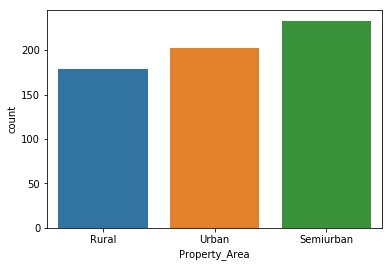

In [42]:
sns.countplot(df.Property_Area,order=df.Property_Area.value_counts().index[::-1])

We see that Property Area is highest for Semiurban, than  comes Urban and then Rural

# Loan_Status

* This is the target variable.
* This variable shows if the loan is approved or not.

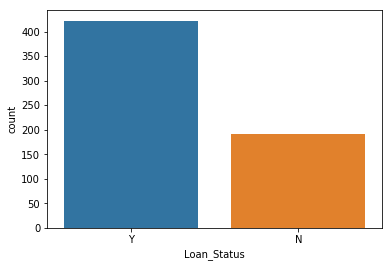

In [43]:
sns.countplot(df.Loan_Status)

We see that Loan was approved for Majority of People

In [44]:
df.Loan_Status.value_counts()/len(df) * 100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

* 68 percent of the loans were approved and the rest were declined.

## Addressing the missing values

* We will keep the raw dataframe as it is and create a copy of the raw dataframe and  clean that dataset and build a model on top of that dataset cleaned dataset.

In [45]:
df1 = df.copy()
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
df1.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

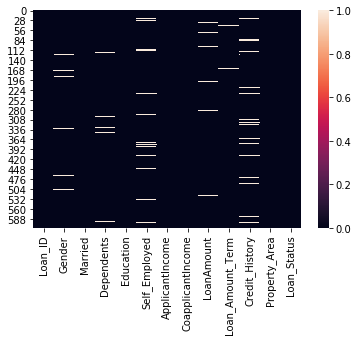

In [47]:
sns.heatmap(df1.isna())

We see that there are null values in dataset in columns Gender,Married, Dependents, Self Employed, LoanAmount,    Loan_Amount_Term, 
Credit_History 

As we see there are null values in Dataset, so we need to fill the missing values with mean values

# We Need Encoding in The Data

In [48]:

cols=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area', 'Loan_Status']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols:
    df1[i]=le.fit_transform(df1[i]) 

In [49]:
df1.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [51]:
#Here we replace all the null values or Nan values with the mean values
cols1=['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']
for i1 in cols1:
    df1[i1].fillna(df1[i1].mean(),inplace=True)

In [52]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [53]:
df1.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [54]:
# We don't want Loan_Id as this has no influence on Loan_Status
df1.drop('Loan_ID',1,inplace=True)

## Removing the outliers

In [55]:
# z score technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))
z.shape

(614, 12)

In [56]:
threshold=3
print(np.where(z>3))

(array([  9,  11,  14,  19,  24,  29,  30,  68,  94,  95, 107, 111, 114,
       126, 130, 133, 155, 155, 158, 170, 171, 171, 177, 177, 183, 185,
       218, 231, 236, 242, 262, 268, 278, 295, 308, 313, 333, 333, 333,
       336, 344, 369, 374, 380, 385, 402, 409, 411, 417, 432, 432, 443,
       447, 463, 468, 487, 495, 497, 506, 523, 525, 535, 542, 546, 561,
       575, 579, 581, 585, 600, 600, 601, 604], dtype=int64), array([6, 4, 8, 4, 4, 4, 4, 8, 8, 4, 4, 4, 4, 5, 7, 8, 5, 7, 4, 4, 5, 7,
       6, 7, 5, 5, 4, 4, 4, 8, 8, 4, 7, 4, 7, 8, 4, 5, 7, 4, 4, 7, 4, 4,
       4, 6, 5, 4, 6, 4, 7, 5, 4, 4, 4, 7, 8, 8, 7, 7, 7, 4, 4, 8, 7, 8,
       4, 6, 8, 4, 6, 4, 7], dtype=int64))


In [57]:
df1_new=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df1_new.shape)

(614, 12)
(548, 12)


## Percentage Data Loss

In [58]:
loss_percent=((614-548)/614)*100
loss_percent

10.749185667752444

Here we see that loss percent is very high i.e 10%, so we will not remove the outliers

# Checking Skewness

In [59]:
df1.skew()

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

We see that there is high skewness in data. therefore transformation is required to remove skewness

In [60]:
# As we don't have to remove skewness in categorical data
to_skew_trnsfm_var = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [61]:
# Square Root Transformation
np.sqrt(df1[to_skew_trnsfm_var]).skew()

ApplicantIncome      2.967286
CoapplicantIncome    0.979561
LoanAmount           1.314162
dtype: float64

In [62]:
df1[to_skew_trnsfm_var] = np.sqrt(df1[to_skew_trnsfm_var])

# Splitting independent and target variables x and y

In [63]:
x=df1.drop("Loan_Status",axis=1)
y=df1["Loan_Status"]

# Finding Best Random State

In [64]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ", maxAccu,"on Random_State",maxRs)

Best Accuracy is  0.8861788617886179 on Random_State 8


# Train and Test Split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=8)

## Training our model

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

lg=LogisticRegression()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

Running all the models and checking their accuracy and cross validation score. The model with least difference between Cross Validation and Accuracy Score is our best model

In [67]:
model=[lg,sv,rf,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score: of',m)
    acc=accuracy_score(y_test,pred)
    print(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between Accuracy Score and CrossValidation Score:",abs(acc-crossval))
    print("\n")

Accuracy score: of LogisticRegression()
0.8861788617886179
[[19 14]
 [ 0 90]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.73        33
           1       0.87      1.00      0.93        90

    accuracy                           0.89       123
   macro avg       0.93      0.79      0.83       123
weighted avg       0.90      0.89      0.87       123

Cross Validation Score: 0.807823537251766
Difference Between Accuracy Score and CrossValidation Score: 0.0783553245368519


Accuracy score: of SVC()
0.7317073170731707
[[ 0 33]
 [ 0 90]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.73      1.00      0.85        90

    accuracy                           0.73       123
   macro avg       0.37      0.50      0.42       123
weighted avg       0.54      0.73      0.62       123

Cross Validation Score: 0.6872984139677463
Difference Between Accuracy Score and 

Minimum difference in accuracy & cross validation score is for Decision Tree Classifier so this is our best model

# Hyper Parameter Tuning

In [68]:
from sklearn.model_selection import GridSearchCV
#Creating parameter list to pass in GridSearchCV
parameters={'max_depth':np.arange(2,15),'criterion':['gini','entropy']}

In [69]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [70]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [71]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [72]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [73]:
accuracy_score(y_test,GCV_pred)

0.8861788617886179

We see that there is improvement in Accuracy

# Saving The Model

In [75]:
#Saving the best model
import joblib 
joblib.dump(GCV,'loan_prediction.obj')

['loan_prediction.obj']